Project Statement:
AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
1) Determine the states that are generating the highest revenues and
2) Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year

In [338]:
# importing all the libiries that is useable in the project.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


df = pd.read_excel("salse.xlsx")

df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [339]:
df.isnull().sum() # checking the null valuse on each column

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [340]:
# fill the nulls
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [341]:
df.isnull().sum() # making sure that all the null values are filled

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [342]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [343]:
data = df[["State", "Group", "Unit", "Sales"]]   # making sub-dataset for expermintaion only
data 

,State,Group,Unit,Sales
0,WA,Kids,8,20000
1,WA,Men,8,20000
2,WA,Women,4,10000
3,WA,Seniors,15,37500
4,WA,Kids,3,7500
...,...,...,...,...
7555,TAS,Seniors,14,35000
7556,TAS,Kids,15,37500
7557,TAS,Men,15,37500
7558,TAS,Women,11,27500


In [344]:
data

,State,Group,Unit,Sales
0,WA,Kids,8,20000
1,WA,Men,8,20000
2,WA,Women,4,10000
3,WA,Seniors,15,37500
4,WA,Kids,3,7500
...,...,...,...,...
7555,TAS,Seniors,14,35000
7556,TAS,Kids,15,37500
7557,TAS,Men,15,37500
7558,TAS,Women,11,27500


In [345]:
df.describe() # Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.)

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [346]:
df.mode()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Afternoon,NSW,Kids,9.0,22500.0
1,2020-10-02,Evening,NT,Men,NaN,NaN
2,2020-10-03,Morning,QLD,Seniors,NaN,NaN
3,2020-10-04,NaN,SA,Women,NaN,NaN
4,2020-10-05,NaN,TAS,NaN,NaN,NaN
...,...,...,...,...,...,...
85,2020-12-26,NaN,NaN,NaN,NaN,NaN
86,2020-12-27,NaN,NaN,NaN,NaN,NaN
87,2020-12-28,NaN,NaN,NaN,NaN,NaN
88,2020-12-29,NaN,NaN,NaN,NaN,NaN


In [347]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [348]:
groupby_df = df.groupby('Group')     # Determine which group is generating the highest sales, and which group is generating the lowest sales.
sales_a = groupby_df['Sales'].sum()
sales_a.sort_values()

In [351]:
groupby_dd = df.groupby('State')    # Determine which state is generating the highest sales, and which state is generating the lowest sales.
sales_b = groupby_dd["Sales"].sum()
sales_b.sort_values()

In [353]:
df.set_index("Date",inplace=True)

In [354]:
weekly_r = df["Sales"].resample('W').sum() # Generate weekly report for the analysis made.

In [355]:
weekly_r

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

In [356]:
montly_r = df["Sales"].resample('M').sum() # Generate Monthly report for the analysis made.

In [357]:
montly_r

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: M, Name: Sales, dtype: int64

In [358]:
quarter_r = df["Sales"].resample('Q').sum() # Generate Quartely report for the analysis made.

In [359]:
quarter_r

Date
2020-12-31    340302500
Freq: Q-DEC, Name: Sales, dtype: int64

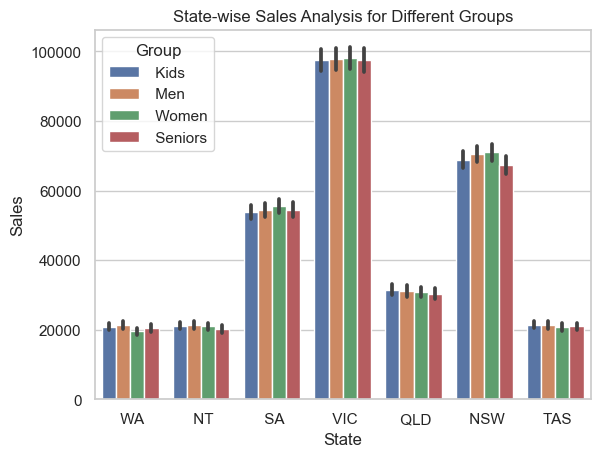

In [360]:
sns.barplot(data=df, x='State', y='Sales', hue='Group')    # State-wise sales analysis for different groups (kids, women, men, and seniors)
plt.title("State-wise Sales Analysis for Different Groups")
plt.show()

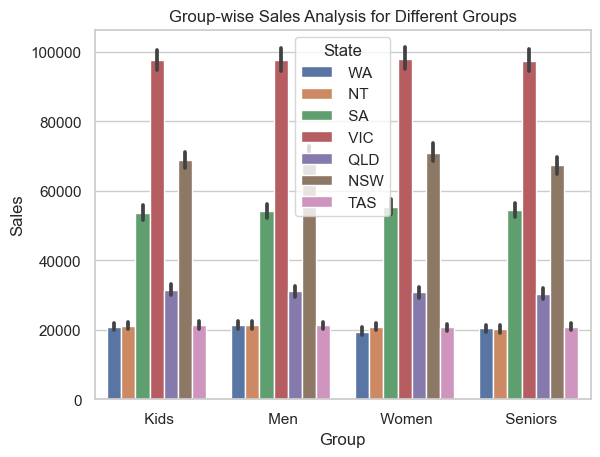

In [361]:
sns.barplot(data=df, x='Group', y='Sales', hue='State')     #  Group-wise sales analysis (kids, women, men, and seniors) across different states.
plt.title("Group-wise Sales Analysis for Different Groups")
plt.show()

In [362]:
groupby_df = df.groupby(['Time'])
sales_a = groupby_df['Sales'].sum()
sales_a

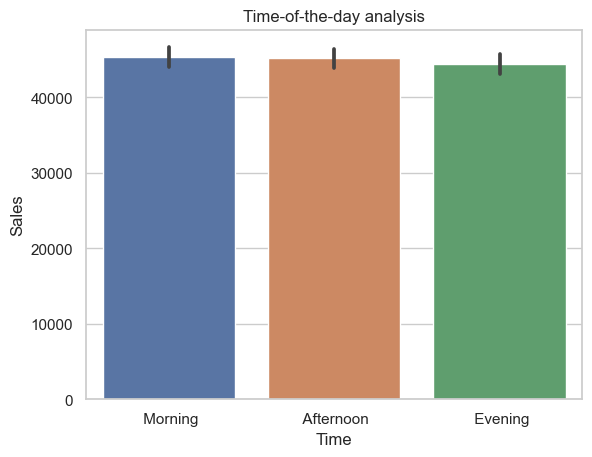

In [364]:
sns.barplot(data=df, x='Time', y='Sales')  # Time-of-the-day analysis
plt.title("Time-of-the-day analysis")
plt.show()

In [365]:
daily_r = df["Sales"].resample('D').sum()
daily_r

Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    4715000
2020-12-27    4637500
2020-12-28    4595000
2020-12-29    4607500
2020-12-30    4590000
Freq: D, Name: Sales, Length: 91, dtype: int64

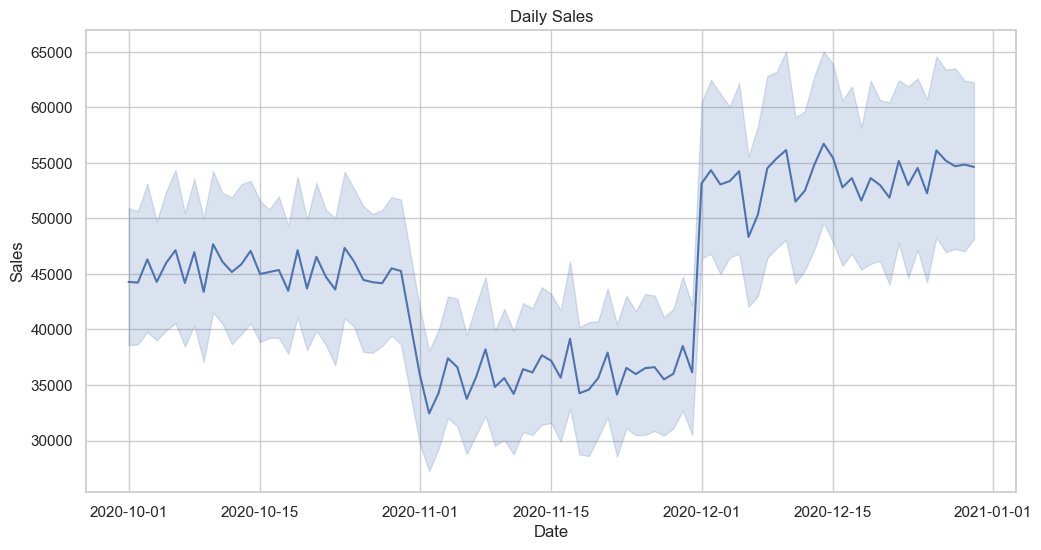

In [366]:
plt.figure(figsize=(12, 6))             # Daily Sales figure
sns.set(style="whitegrid")

sns.lineplot(data=df, x='Date', y='Sales')
plt.title("Daily Sales")
plt.show()

<Axes: xlabel='Date'>

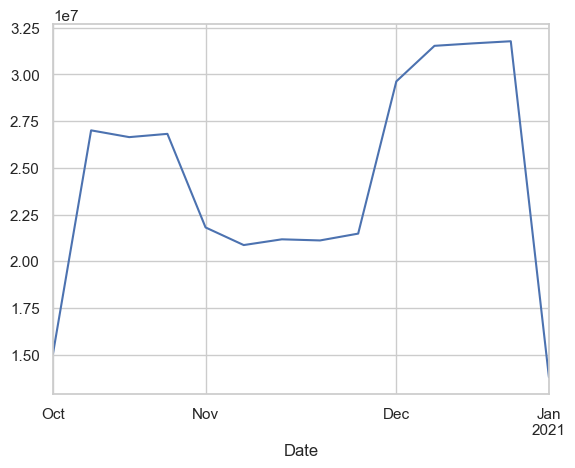

In [367]:
df["Sales"].resample('W').sum().plot()     # Weekly Sales figure

<Axes: xlabel='Date'>

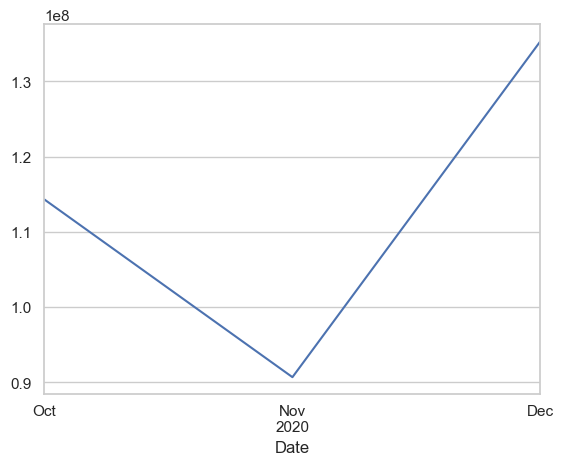

In [368]:
df["Sales"].resample('M').sum().plot() # Monthly Sales figure

<Axes: xlabel='Date', ylabel='Sales'>

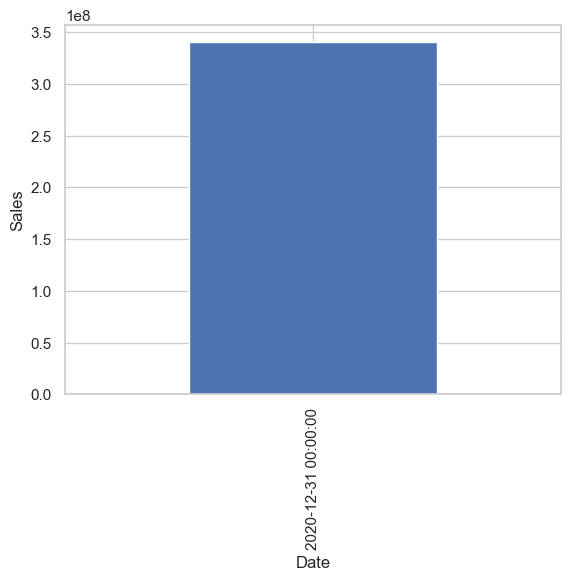

In [369]:
df["Sales"].resample('Q').sum().plot(kind="bar", ylabel="Sales", ) # Qurtly Sales figure

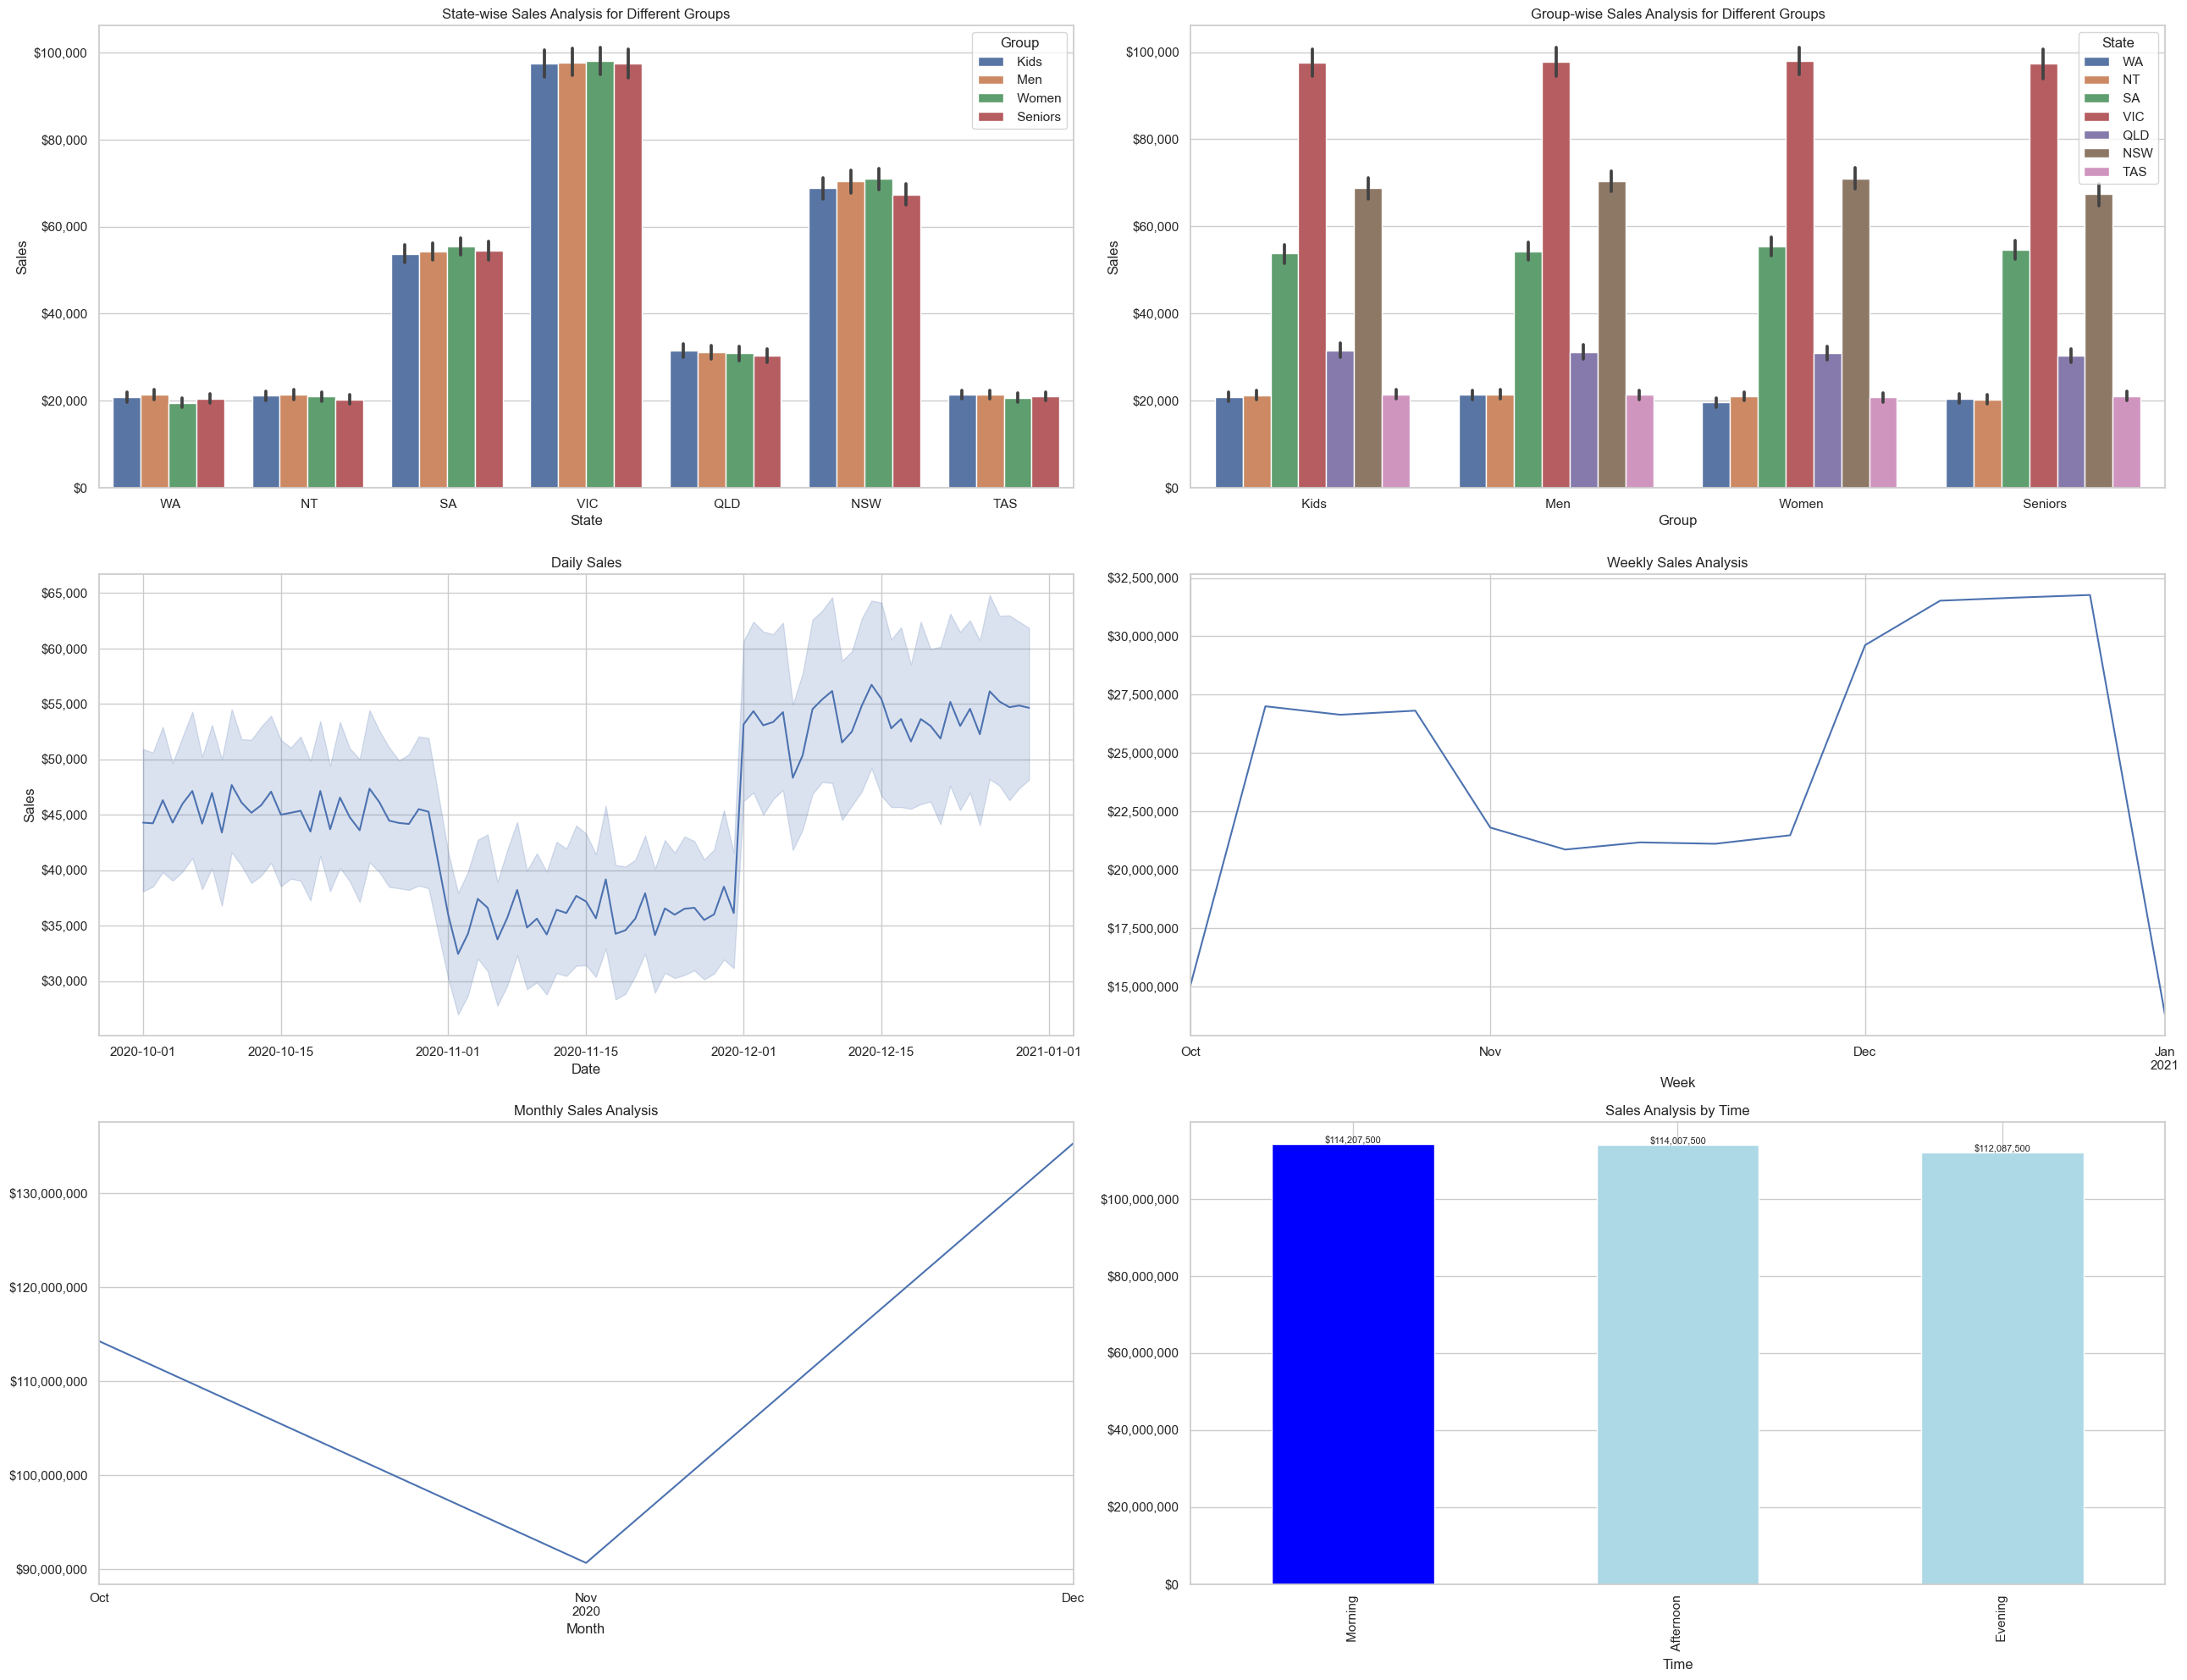

In [407]:
# showing all the plots in one dashboards.


# this function is used to format the y-axis values
def custom_format(x, pos):
    formatted_label = '${:,.0f}'.format(x)  # Format with commas and no decimal places
    return formatted_label

visual_data = df.copy()

# Create a dashboard using subplots
fig, axes = plt.subplots(3, 2, figsize=(26, 20))

# for formatting the y-axis
for ax in axes.flatten():
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_format))

# State-wise sales analysis for different groups
sns.barplot(data=df, x='State', y='Sales', hue='Group',ax=axes[0,0])
axes[0,0].set_title("State-wise Sales Analysis for Different Groups")

# Group-wise sales analysis across different states
sns.barplot(data=df, x='Group', y='Sales', hue='State', ax=axes[0, 1])
axes[0,1].set_title("Group-wise Sales Analysis for Different Groups")


# Daily sales analysis
sns.lineplot(data=df, x='Date', y='Sales', ax=axes[1, 0])
axes[1, 0].set_title("Daily Sales")
axes[1, 0].set_xlabel('Date')

# Weekly sales analysis
df["Sales"].resample('W').sum().plot(ax=axes[1, 1])
axes[1, 1].set_title('Weekly Sales Analysis')
axes[1, 1].set_xlabel('Week')

# Monthly sales analysis
df["Sales"].resample('M').sum().plot(ax=axes[2, 0])
axes[2, 0].set_title('Monthly Sales Analysis')
axes[2, 0].set_xlabel('Month')


time_sales = visual_data.groupby('Time')['Sales'].sum().sort_values(ascending=False)

# Find the index of the highest value
max_value_index = time_sales.idxmax()

# Create a list of colors for each bar, setting the highest bar to a different color
colors = ['lightblue' if x != max_value_index else 'blue' for x in time_sales.index]

# Sales analysis by time
time_sales.plot(kind='bar', color=colors ,ax=axes[2, 1])
axes[2, 1].set_title('Sales Analysis by Time')
axes[2, 1].set_xlabel('Time')

for i, v in enumerate(time_sales):
    axes[2, 1].text(i, v, f'{custom_format(v,i)}', ha='center', va='bottom', fontsize=8)

# Adjust layout and show the dashboard
plt.tight_layout()
plt.show()